# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [56]:
# Code Here
#!pip install palmerpenguins
from palmerpenguins import load_penguins
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor #KNeighborsClassifer IS ONLY FOR CATEGORICAL VARIABLES IN THE Y
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from plotnine import *
import numpy as np

In [20]:
#first few rows of penguins dataset
penguins = load_penguins()
penguins.head()

#remove na values
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [21]:
#define X and y, predicting bill_depth_mm using other variables in the dataset
X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [22]:
#dummify all variables - species, island, sex (all objects)
ct = ColumnTransformer([
  ("dummify",
  OneHotEncoder(sparse_output = False, handle_unknown = "ignore"),
  make_column_selector(dtype_include=object)), #selecting all columns that are categorical
  ("standardize",
  StandardScaler(),
  make_column_selector(dtype_include=np.number)) #standardizing numerical variables
  ], remainder = "passthrough" #keep everything else
)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

## Linear Regression

In [23]:
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_reg", LinearRegression())]
).set_output(transform = "pandas")

In [24]:
#fit pipeline
fitted_lr_pipeline = lr_pipeline.fit(X_train, y_train)
fitted_lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cedcbe80550>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cedcbe838e0>)])),
                ('linear_reg', LinearRegression())])

In [25]:
#predict bill_depth_mm
y_preds_train = fitted_lr_pipeline.predict(X_train)
y_preds_test = fitted_lr_pipeline.predict(X_test)

mse_train_lr = mean_squared_error(y_train, y_preds_train)
mse_train_lr


0.5922598788889164

In [26]:
mse_test_lr = mean_squared_error(y_test, y_preds_test)
mse_test_lr

0.6503745327641116

## kNN model 1

In [57]:
#using n_neighbors = 3
knn3_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_3", KNeighborsRegressor(n_neighbors=3))]
).set_output(transform = "pandas")

In [48]:
#fit pipeline
fitted_knn3_pipeline = knn3_pipeline.fit(X_train, y_train)
fitted_knn3_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cedcbe80550>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cedcbe838e0>)])),
                ('knn_5', KNeighborsRegressor(n_neighbors=3))])

In [49]:
#predict bill_depth_mm
y_preds_train_knn3 = fitted_knn3_pipeline.predict(X_train)
y_preds_test_knn3 = fitted_knn3_pipeline.predict(X_test)

mse_train_knn3 = mean_squared_error(y_train, y_preds_train_knn3)
mse_train_knn3

0.38464524765729585

In [50]:
mse_test_knn3 = mean_squared_error(y_test, y_preds_test_knn3)
mse_test_knn3

0.7385449735449735

## knn model 2

In [58]:
#using n_neighbors = 10
knn10_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_10", KNeighborsRegressor(n_neighbors=10))]
).set_output(transform = "pandas")

In [59]:
#fit pipeline
fitted_knn10_pipeline = knn10_pipeline.fit(X_train, y_train)
fitted_knn10_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cedcbe80550>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cedcbe838e0>)])),
                ('knn_10', KNeighborsRegressor(n_neighbors=10))])

In [60]:
#predict bill_depth_mm
y_preds_train_knn10 = fitted_knn10_pipeline.predict(X_train)
y_preds_test_knn10 = fitted_knn10_pipeline.predict(X_test)

mse_train_knn10 = mean_squared_error(y_train, y_preds_train_knn10)
mse_train_knn10

0.5531056224899599

In [61]:
mse_test_knn10 = mean_squared_error(y_test, y_preds_test_knn10)
mse_test_knn10

0.5794809523809524

## Decision Tree

In [39]:
dt_pipeline = Pipeline(
  [("preprocessing", ct),
  ("decision_tree", DecisionTreeRegressor())]
).set_output(transform = "pandas")

In [40]:
#fit pipeline
fitted_dt_pipeline = dt_pipeline.fit(X_train, y_train)
fitted_dt_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cedcbe80550>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cedcbe838e0>)])),
                ('decision_tree', DecisionTreeRegressor())])

In [41]:
#predict bill_depth_mm
y_preds_train_dt = fitted_dt_pipeline.predict(X_train)
y_preds_test_dt = fitted_dt_pipeline.predict(X_test)

mse_train_dt = mean_squared_error(y_train, y_preds_train_dt)
mse_train_dt

0.0

In [42]:
mse_test_dt= mean_squared_error(y_test, y_preds_test_dt)
mse_test_dt

1.20047619047619

# Plot

In [89]:
#create dataframe with training mse and testing mse
model_type = ["lr", "knn3", "knn10", "decision_tree"]
features = [7, 7, 7, 7]
mse_train = [mse_train_lr, mse_train_knn3, mse_train_knn10, mse_train_dt]
mse_test = [mse_test_lr,mse_test_knn3,mse_test_knn10,mse_test_dt]
mse_df = pd.DataFrame({"model": model_type,
                       "features": features,
                       "mse_train": mse_train,
                       "mse_test": mse_test})
mse_df

,model,features,mse_train,mse_test
0,lr,7,0.592260,0.650375
1,knn3,7,0.384645,0.738545
2,knn10,7,0.553106,0.579481
3,decision_tree,7,0.000000,1.200476


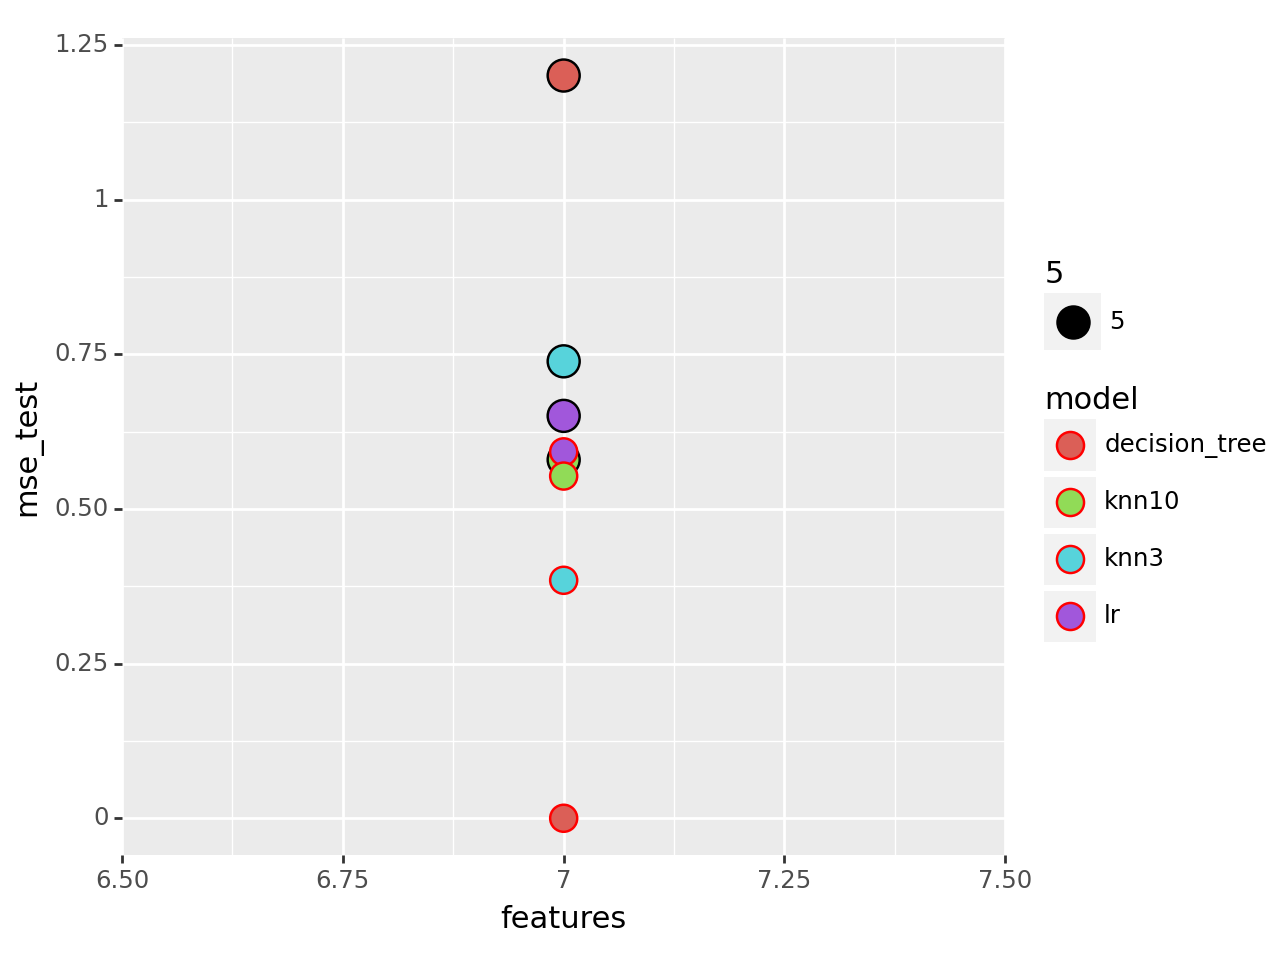

<Figure Size: (640 x 480)>

In [90]:
#plot
(ggplot(mse_df, aes(x = "features", fill = "model"))
+ geom_point(aes(y = "mse_test", size = 5))
+ geom_point(aes(y = "mse_train"), color = "red", size = 5))

In this plot, the points with the red outline are the training MSE, and the dots with the black outline are the testing MSE. These plots are colored based on what model they are from. From this plot, we can see that the knn_10 has the smallest testing error, and the decision tree has the largest testing error. This makes sense; when the value of K is large, it is taking the average of all of these 10 neighboring values and predicting the bill_depth_mm. Since there are so many values, the model is not flexible with the training data (it is too restricted), and it is tailoring to the observations too much. Thus, this is underfitting. The testing data will be very similar to the training data, so the testing error will be small.